# Toy Monte Carlo

## Génération de nombres aléatoires selon une distribution donnée

Nous allons commencer par voir une première méthode pour générer des nombres aléatoires suivant une distribution donnée.
La génération de nombres aléatoires selon une distribution uniforme est relativement simple. Pour cela, **nous allons répartir des points de manière uniforme sur un plan.**

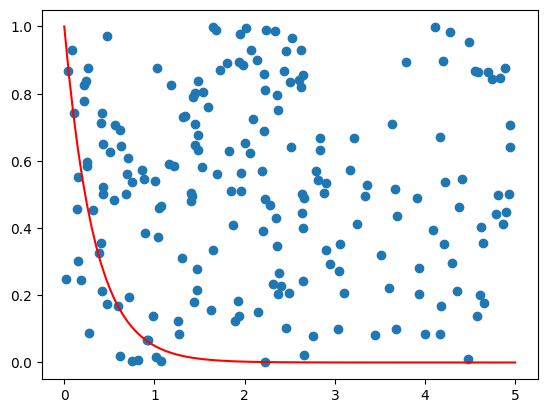

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def f(x, A=1, c=3):
    return A * np.exp(-c*x)

X = []
Y = []

for _ in range(0,200):
    x = random.uniform(0,5)
    y = random.uniform(0,1)
    X.append(x)
    Y.append(y)

plt.scatter(X,Y, label='Points générés')
plt.plot(np.linspace(0,5,100), f(np.linspace(0,5,100)), 'r', label='Fonction f')
plt.show()




Cependant, vous pouvez le voir, nous constatons qu'ils ne suivent pas encore la distribution de la fonction $f$. Puisque $f$ représente une densité de probabilité, nous allons uniquement conserver les points situés sous sa courbe.

Cela signifie que nous obtiendrons une concentration plus élevée de valeurs de $x$ là où $f(x)$ est grand et une plus faible concentration là où $f(x)$ est petit. (*On peut également voir ça en se disant que le nombre de points sous la courbe par rapport au nombre total de points générés est proportionnel à l'aire sous la courbe par rapport à l'aire totale du rectangle du graphe.*)


### Limitation de cette méthode

Un inconvénient de cette approche est son efficacité réduite, car nous ne conservons qu'une partie des points générés (*seulement 6% dans ce cas*). Une amélioration possible consiste à ne générer que des points d'ordonnée $y$ inférieure au maximum de $f(x)$ sur l'intervalle $[0,5]$.

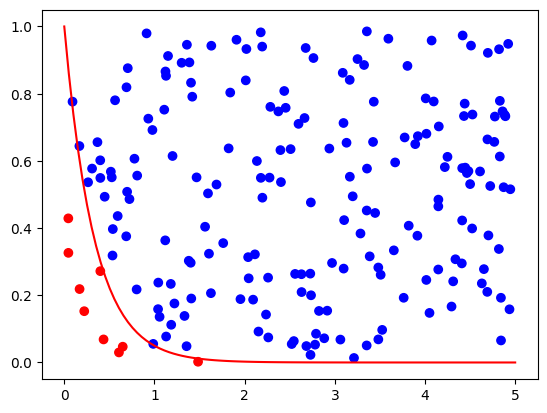

In [2]:
colors = []
X = []
Y = []
for _ in range(0,200):
    x = random.uniform(0,5)
    y = random.uniform(0,1)
    X.append(x)
    Y.append(y)
    if y < f(x):
        colors.append('r')
    else:
        colors.append('b')

plt.scatter(X,Y, c=colors, label='Points générés')
plt.plot(np.linspace(0,5,100), f(np.linspace(0,5,100)), 'r', label='Fonction f')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
def f(x, A=1, c=3):
    return A * np.exp(-c*x)


## Méthode $F^{-1}$

La méthode $F^{-1}$ permet d'optimiser l'efficacité à 100 %, contrairement à la méthode précédente.
Cette approche repose sur l'inversion de la fonction de répartition, ce qui **garantit que chaque valeur générée respecte exactement la distribution cible, sans perte de points inutiles**.


Cette methode se met en place de la manière suivante:

Soit $ f: [a,b] \to \mathbb{R} $, une densité de probabilité.

- Définir la fonction de répartition $ F $, qui est la primitive de la densité de probabilité $ f $ :

  $$
  F(x) = \int_{a}^{x} f(t) \, dt
  $$

- Trouver son inverse $ F^{-1} $, qui existe nécessairement, car $ F $ est bijective sur $ [a,b] $ et prend ses valeurs dans $ [0,1] $.

- Générer un nombre aléatoire $ y $ suivant une distribution uniforme sur $ [0,1] $, puis trouver $ x $ à l’aide de $ F^{-1} $ :

  $$
  x = F^{-1}(y)
  $$

Ainsi, $ x $ suit la distribution donnée par $ f $.







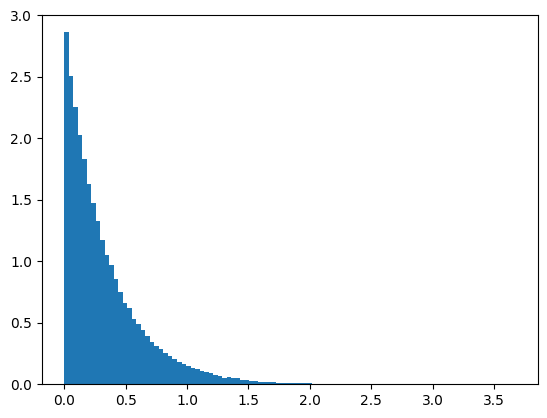

In [5]:
a,b = (0,5)
interval = (a,b)
c = 3

A = c / ( np.exp(-c*a) - np.exp(-c*b) )

def F(x, interval, A=1, c=3):
    a, b = interval
    return -A/c * np.exp(-c*x) + A/c * np.exp(-c*a)

def F_1(y, interval, A=1, c=3):
    a, b = interval
    return -1/c*np.log(-c/A * (y - A/c * np.exp(-c*a)))

X = []

for _ in range(0,100_000):
    y = random.uniform(0,1)
    X.append(F_1(y, interval, A, c))
    
plt.hist(X, bins=100, density=True)
plt.show()

## Genération de donnée pour fit un modèle

(En attente d'une ébauche que je corrigerai...)

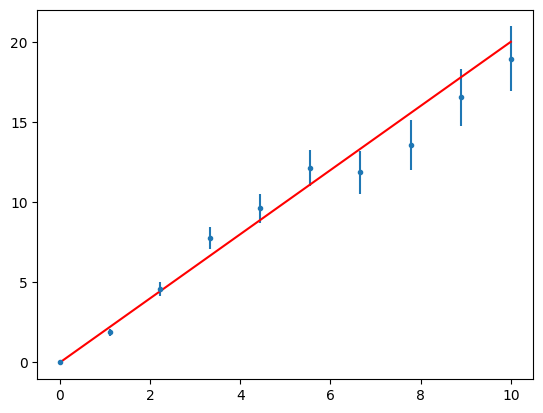

In [6]:
import random
import scipy.optimize as opt

def gen_data(n, model, sigma):
    x = np.linspace(0,10, n)
    y_th = model(x)
    sigmas = sigma(x, y_th)
    y = np.random.normal(0, sigmas) + y_th
    return x, y, sigmas

def model(x, a=2, b=0):
    return a*x+b

def sigma(x, y):
    return 0.1*y

datas = gen_data(10, model, sigma)

x, y, sigmas = datas

y_th = model(x)

plt.errorbar(x, y, yerr=sigmas, fmt='.')
plt.plot(x, y_th, 'r')
plt.show()